# Inteligentne nożyce
## Przygotowanie środowiska

In [61]:
from pathlib import Path
import cv2, timeit, json, numpy as np
from src.pathfinder import Pathfinder
from src.utilities import eval_path
import matplotlib.pyplot as plt
from collections import Counter


In [62]:
data_dir = Path("./data")
configs_dir = data_dir / Path("./configs")
images_dir = data_dir / Path("./images")
paths_txt_dir = data_dir / Path("./paths_txt")
paths_img_dir = data_dir / Path("./paths_img")

times_file = data_dir / Path("./times.txt")
summary_file = data_dir / Path("./summary.txt")

data_dir.mkdir(exist_ok=True)
configs_dir.mkdir(exist_ok=True)
images_dir.mkdir(exist_ok=True)
paths_txt_dir.mkdir(exist_ok=True)
paths_img_dir.mkdir(exist_ok=True)

## Stworzenie zestawu konfiguracji

In [63]:
def create_config_json(json_name, laplace, direction, magnitude):
    jsondict = {
        "laplace_w": laplace,
        "direction_w": direction,
        "magnitude_w": magnitude,
        "laplace_kernels": [3, 5, 7],
        "gaussian_kernel": 5,
        "laplace_weights": [0.2, 0.3, 0.5],
        "maximum_cost": 255,
    }

    with open(json_name, 'w+') as f:
        json.dump(jsondict, f, indent=4)

In [92]:
limit_up = 5
limit_down = 0
step = 0.3

cfg_num = 0
for laplace in np.arange(limit_down, limit_up, step):
    for direction in np.arange(limit_down, limit_up, step):
        for magnitude in np.arange(limit_down, limit_up, step):
            create_config_json(configs_dir / f"cfg_{cfg_num:05}.json", laplace, direction, magnitude)
            cfg_num += 1
print(f"Created {cfg_num} configurations!")

Created 4913 configurations!


## Wczytanie danych

In [93]:
image = cv2.imread("./testimage3.png")
path_reference = cv2.imread("testimage3_path_reference.png")
selected_points = [(19, 41), (34, 29), (54, 50), (24,64), (19, 41)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_0.png")
path_reference = cv2.imread("./test_images/obraztestowy_0_path.png")
selected_points = [(50,85), (86,83), (80,58), (68,22), (42,18), (10,35), (20,63), (30,94), (50,85)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_1.png")
path_reference = cv2.imread("./test_images/obraztestowy_1_path.png")
selected_points = [(65,59), (79,49), (72,24), (46,33), (49,53), (65,59)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_2.png")
path_reference = cv2.imread("./test_images/obraztestowy_2_path.png")
selected_points = [(50,85), (86,83), (80,58), (68,22), (42,18), (10,35), (20,63), (30,94), (50,85)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_3.png")
path_reference = cv2.imread("./test_images/obraztestowy_3_path.png")
selected_points = [(67, 71), (84,54), (80,40), (64,33), (46,52), (67,71)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_4.png")
path_reference = cv2.imread("./test_images/obraztestowy_4_path.png")
selected_points = [(67, 71), (84,54), (80,40), (64,33), (46,52), (67,71)]

Ściezka dla obrazów 5-9 

In [ ]:
image = cv2.imread("./test_images/obraztestowy_5.png")
path_reference = cv2.imread("./test_images/obraztestowy_5_9_path.png")
selected_points = [(382,510), (381,496), (379,489), (373, 469), (373, 466), (368,454), (371, 425), (376, 356), (368, 292), (367, 221), (370, 209), (385, 198), (397, 186), (409, 166), (412, 156), (413, 116), (412, 110), (370, 130), (345, 144), (329, 121), (325, 110), (313, 97), (305, 91), (295, 75), (274, 62), (218, 45), (150, 78), (123, 129), (118, 181), (126, 201), (139, 239), (90, 289), (83, 348), (74, 391), (65, 510)]

Ścieżka dla obrazów 10-13

In [ ]:
image = cv2.imread("./test_images/obraztestowy_10.png")
path_reference = cv2.imread("./test_images/obraztestowy_10_13_path.png")
selected_points = [(381, 509), (370, 462), (386, 381), (382, 318), (372, 247), (367, 211), (416, 112), (396, 110), (383, 120), (344, 144), (217, 45), (126, 115), (121, 136), (119, 185), (126, 204), (139, 238), (108, 262), (89, 279), (79, 382), (67, 509)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_64.png")
path_reference = cv2.imread("./test_images/obraztestowy_64_path.png")
selected_points = [(48, 63), (47, 54), (47, 36), (46, 27), (51, 23), (51, 15), (51, 13), (47, 15), (44, 17), (43, 15), (39, 11), (35, 6), (28,5), (21, 7), (16, 14), (15, 19), (15, 24), (17, 30), (11, 35), (9, 43), (7, 52), (8, 63)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_128.png")
path_reference = cv2.imread("./test_images/obraztestowy_128_path.png")
selected_points = [(96, 126), (92, 112), (97,98), (93,52), (104, 28), (98, 27), (93, 32), (86, 35), (75, 19), (41, 16), (30, 46), (31, 62), (21, 72), (16, 126)]

In [ ]:
image = cv2.imread("./test_images/obraztestowy_1024.png")
path_reference = cv2.imread("./test_images/obraztestowy_1024_path.png")
selected_points = [(766, 1021), (742, 927), (758, 845), (768, 743), (763,662), (744, 493), (729, 420), (829, 231), (787, 222), (757, 246), (702, 279), (691, 291), (424, 91), (257, 223), (276, 480), (231, 513), (182, 560), (143, 822), (126, 1022)]

## Analiza dokładności stworzonych konfiguracji

In [94]:
times_str = "cfg_num;start_xy;end_xy;exec_time\n"
summary_str = "cfg_num;path_score;time_total\n"
all_scores = {}
min_configs = []
min_score = np.inf
for config_file in configs_dir.glob("*.json"):
    print(f"\r Processing configuration: {config_file}", end="")
    image_temp = image.copy()
    path_image = np.zeros_like(image)
    cfg_num = config_file.stem.split("_")[1]

    pathfinder = Pathfinder(image, config_file=config_file)

    path = []
    time_total = 0
    for i in range(len(selected_points)-1):
        start_xy = selected_points[i]
        end_xy = selected_points[i+1]
        t_start = timeit.default_timer()
        found_path = pathfinder.find_path(*start_xy, *end_xy)
        t_end = timeit.default_timer()
        exec_time = t_end - t_start
        times_str += f"{cfg_num};{start_xy};{end_xy};{exec_time}\n"
        time_total += exec_time
        path.extend(found_path)

    path_str = ""
    for x, y in path:
        image_temp[x, y, :] = (255, 255, 0)
        path_image[x, y, :] = (255, 255, 255)
        path_str += f"{x},{y}\n"
    pathfile = paths_txt_dir / f"path_{cfg_num}.txt"
    pathfile.write_text(path_str)

    cv2.imwrite(str(images_dir / f"img_{cfg_num}.png"), image_temp)
    cv2.imwrite(str(paths_img_dir / f"path_{cfg_num}.png"), path_image)
    
    path_score, hits, misses = eval_path(path_image, path_reference)
    all_scores[config_file] = path_score
    summary_str += f"{cfg_num};{path_score};{time_total}\n"

    if path_score == min_score:
        min_configs.append(config_file)
    elif path_score < min_score:
        min_score = path_score
        min_configs = [config_file]

times_file.write_text(times_str)
summary_file.write_text(summary_str)

 Processing configuration: data\configs\cfg_04912.json

165105

In [95]:
print(f"Best score:\n{min_score}")
print(f"Best configs:")
for best_cfg in min_configs:
    print(f"{best_cfg}")

Best score:
0.0065
Best configs:
data\configs\cfg_00545.json
data\configs\cfg_00562.json


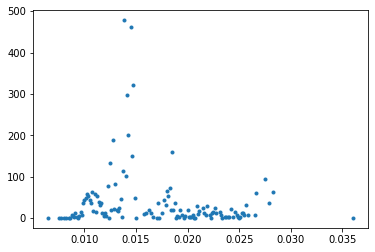

In [96]:
counted_scores = dict(Counter(list(all_scores.values())))
cscores_vals, cscores_count = zip(*counted_scores.items())
plt.plot(cscores_vals, cscores_count, '.')
plt.show()


## Testowanie wybranych konfiguracji

In [69]:
iterations = 100
scores = {}
times = {}

### Powtarzalność

In [70]:
for cfg in min_configs:
    scores[cfg] = []
    all_paths = []
    for j in range(iterations):
        print(f"\r{cfg} === {j}", end="")
        path_image = np.zeros_like(image)

        pathfinder = Pathfinder(image, config_file=cfg)

        path = []
        for i in range(len(selected_points)-1):
            start_xy = selected_points[i]
            end_xy = selected_points[i+1]
            found_path = pathfinder.find_path(*start_xy, *end_xy)
            path.extend(found_path)
        all_paths.append(path)
        for x, y in path:
            path_image[x, y, :] = (255, 255, 255)
        
        path_score, hits, misses = eval_path(path_image, path_reference)
        scores[cfg].append(path_score)
    print()
    if not all(all_paths[0] == l for l in all_paths[1:]):
        print(f"There are inconsistencies in path found for {cfg} file")

data\configs\cfg_00045.json === 9


### Czas wykonania

In [71]:
for cfg in min_configs:
    for j in range(iterations):
        print(f"\r{cfg} === {j}", end="")
        if not cfg in times:
            times[cfg] = {}

        path_image = np.zeros_like(image)

        pathfinder = Pathfinder(image, config_file=cfg)

        path = []
        for i in range(len(selected_points)-1):
            if not i in times[cfg]:
                times[cfg][i] = []
            start_xy = selected_points[i]
            end_xy = selected_points[i+1]
            t_start = timeit.default_timer()
            found_path = pathfinder.find_path(*start_xy, *end_xy)
            t_end = timeit.default_timer()
            exec_time = t_end - t_start
            times[cfg][i].append(exec_time)


data\configs\cfg_00045.json === 9

In [72]:
print("Indexes in times dictionary correlate to finding paths:")
for i in range(len(selected_points)-1):
    print(f"{i} = from {selected_points[i]} to {selected_points[i+1]}")

Indexes in times dictionary correlate to finding paths:
0 = from (19, 41) to (34, 29)
1 = from (34, 29) to (54, 50)
2 = from (54, 50) to (24, 64)
3 = from (24, 64) to (19, 41)


In [73]:
for k, v in times.items():
    print(f"=== {k} ===")
    for kk, vv in v.items():
        print(f"{kk}'s avg: {sum(vv)/iterations}")


=== data\configs\cfg_00045.json ===
0's avg: 0.06243913999996949
1's avg: 0.08012940999992679
2's avg: 0.04840346999994836
3's avg: 0.042392610000024436


## Wykresy